---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

- Estudiante: **Sebastian Herrera Esquivel**
- Carné: **B93851**
- Estudiante: **Isaac Stalley**
- Carné: **B97756**

- Grupo: ****


# `P5` - *Procesos M/M/s*

#### Parte 1

$i$ es el número de personas en el sistema de vacunacion. La longitud de la fila debe ser $L_q = i - 1 \leq 50$  (*queue length*) el 95\% del tiempo.

$$
P( \text{51 o más personas en el sistema} ) = \sum_{i=51}^{\infty} (1 - \rho) \rho^i  = 1 - \sum_{i=0}^{50} (1 - \rho) \rho^i = \rho^{51}
$$

que depende de $\rho = \lambda/(\nu \cdot s)$, donde s es el numero de servidores. 

De los datos del problema: $\lambda = 4$ y $\nu=0.25$. Para tener una fila de 50 o menos personas el 95\% del tiempo se requieren s servidores:

$$
\begin{aligned}
P( \text{51 o más personas en el sistema} ) = \rho^{51} & = \left( \frac{\lambda}{\nu \cdot s} \right)^{51} \leq 0.05 \\
(\nu \cdot s)^{51} & \geq \frac{\lambda^{51}}{0.05} = \frac{4^{51}}{0.05} = 1.0141\cdot 10^{32} 
\end{aligned}
$$

$\begin{aligned} \rightarrow s \cdot v &=4.24199 ; V=0.25 \\ S &=16.96 \end{aligned}$

es decir, el sistema debe contar con 17 servidores como minimo para poder satisfacer el requisito de tener 50 personas en cola el 95\% del tiempo.


Parámetro lambda = 4.0
Parámetro nu = 4.25
Número de servidores = 17
Tiempo con más de 50 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 4.41 horas.
Simulación del sistema:


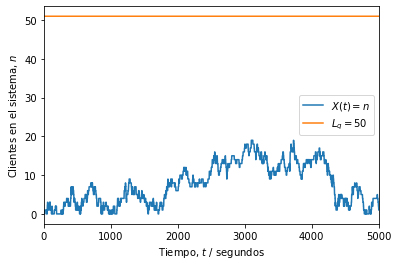

Simulación de un solo servidor:


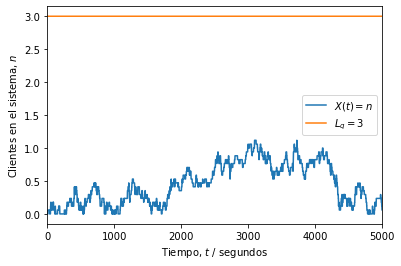

In [18]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


# Número de clientes
N = 1000

# Número de servidores
servidores = 17

# Parámetro de llegada (clientes/segundos)
lam = 4/60

# Parámetro de servicio (servicios/segundos)
nu = 0.25*servidores/60

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/nu)

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 52

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
        exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Número de servidores =', str(servidores))
print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))
print('Simulación del sistema:')

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-2)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 5000))
plt.show()

print('Simulación de un solo servidor:')

# Gráfica de X(t) (estados de un servidor)
plt.figure()
plt.plot(Xt/17)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape)/17)
plt.legend(('$X(t) = n$', '$L_q = $' + str(round((P-2)/17))))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 5000))
plt.show()


---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---